# Example: Simulation of the Ornstein Uhlenbeck Model
Fill me in

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example.

In [3]:
include("Include.jl")

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-132/module-2/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CH

_𝕍 (generic function with 1 method)

## Build and simulate a dynamic setpoint Ornstein Uhlenbeck model
Fill me in

In [5]:
function μ(x,i)::Float64
    value = 0.0;
    value = i ≤ 0.12 || i > 0.36 ? 200.0 : 150.0
    return value;
end

μ (generic function with 1 method)

In [6]:
model = build(MyOrnsteinUhlenbeckModel, (
    μ = μ,
    σ = 48.0,
    θ = 40.0
));

In [7]:
initialcondition = [100.0];
N = 500;
tspan = (start = 0.0, stop = 125/252, step = 1/252); # start, stop, step

In [8]:
(T,X) = solve(model, tspan, initialcondition, N = N);

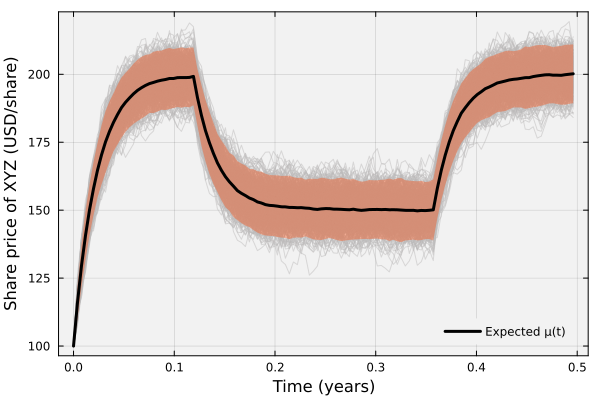

In [9]:
N_σ = 1.96;
mean_sim = mean(X,dims=2)
mean_std = std(X,dims=2)
L = mean_sim .- N_σ*(mean_std)
U = mean_sim .+ N_σ*(mean_std)

plot(T,X, label="", c=colorant"#BDBBBB", legend=:bottomright, lw=1, bg="gray95", background_color_outside="white", 
    framestyle = :box, fg_legend = :transparent, alpha=0.5)
plot!(T, mean_sim,c="orangered", fillrange=U, fillalpha = 0.36, lw=1, label="")
plot!(T, mean_sim,c="orangered", fillrange=L, fillalpha = 0.36, lw=1, label="")
plot!(T, mean_sim,c=:black,lw=3,label="Expected μ(t)")
xlabel!("Time (years)", fontsize=18)
ylabel!("Share price of XYZ (USD/share)", fontsize=18)

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.